In [1]:
import pandas as pd
import numpy as np

In [2]:
claim=pd.read_csv(r"C:\Users\nraje\OneDrive\Desktop\python\DS_Syeda\DS_Syeda\claimants.csv")

In [3]:
claim.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [4]:
claim

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
m = claim['CLMSEX'].mode()
m

0    1.0
Name: CLMSEX, dtype: float64

In [8]:
claim['CLMSEX'].fillna(1.0,inplace=True)

In [9]:
claim.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
claim['CLMINSUR'].mode()

0    1.0
Name: CLMINSUR, dtype: float64

In [11]:
claim['CLMINSUR'].fillna(1.0,inplace=True)

In [12]:
claim['SEATBELT'].mode()

0    0.0
Name: SEATBELT, dtype: float64

In [13]:
claim['SEATBELT'].fillna(0.0 , inplace=True)

In [14]:
claim.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT      0
CLMAGE      189
LOSS          0
dtype: int64

In [16]:
me = claim['CLMAGE'].mean()
me

28.414422241529106

In [17]:
claim['CLMAGE'].fillna(28.4 , inplace=True)

In [18]:
claim.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [20]:
claim.corr()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
CASENUM,1.000000,0.011717,0.030946,0.042214,-0.009150,-0.002305,-0.049590
ATTORNEY,0.011717,1.000000,0.076564,0.076631,-0.055848,0.009864,-0.219715
CLMSEX,0.030946,0.076564,1.000000,0.065976,-0.016327,-0.022437,-0.028412
CLMINSUR,0.042214,0.076631,0.065976,1.000000,0.019953,0.044697,0.004641
SEATBELT,-0.009150,-0.055848,-0.016327,0.019953,1.000000,-0.025374,0.111879
CLMAGE,-0.002305,0.009864,-0.022437,0.044697,-0.025374,1.000000,0.057638
LOSS,-0.049590,-0.219715,-0.028412,0.004641,0.111879,0.057638,1.000000


In [72]:
# y=pd.DataFrame(claim.iloc[:,1])
y = claim.iloc[:,1]

In [60]:
X = claim.iloc[:,2:]

In [61]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.4,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.05998828252236854

In [63]:
model.sum

AttributeError: 'LinearRegression' object has no attribute 'sum'

In [64]:
from sklearn.metrics import r2_score
r2_score(X,y)

ValueError: y_true and y_pred have different number of output (5!=1)

In [65]:
import sklearn
from sklearn.model_selection import train_test_split




In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
model.score(X,y)

0.7037313432835821

In [67]:
y_pred  = model.predict(X)

In [68]:
y_pred_df = pd.DataFrame({'Actual':y,
                         'Predicted_Prob': model.predict(X)})

In [69]:
y_pred_df

,Actual,Predicted_Prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[435, 250],
       [147, 508]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [73]:
model.predict_proba(X)[:,1]

array([2.58921247e-05, 5.04678193e-01, 5.74918289e-01, ...,
       7.14665590e-01, 3.13341526e-01, 6.61221811e-01])

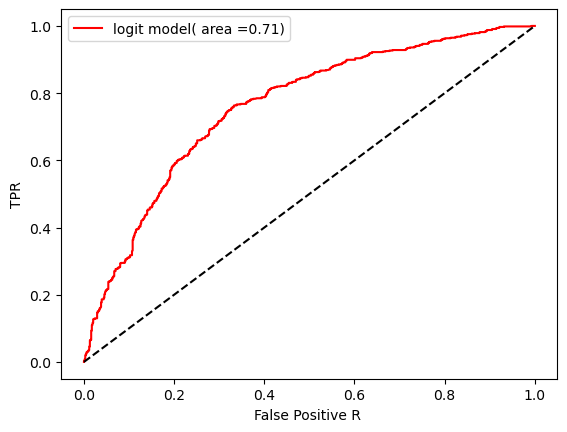

AUC: 0.7053045077171672


In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr,tpr,thresholds = roc_curve(y,model.predict_proba(X)[:,1])

auc= roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt

plt.plot(fpr,tpr,color='red',label='logit model( area =%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive R ')
plt.ylabel('TPR')
plt.legend()
plt.show()
print("AUC:",auc)